In [281]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [283]:
df = pd.read_csv('Customer Purchasing Behaviors.csv')

In [285]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [287]:
df.shape

(238, 7)

In [289]:
df = df.rename(columns={'user_id':'User ID', 'age':'Age', 'annual_income':'Annual Income', 'purchase_amount':'Purchase Amount', 'loyalty_score':'Loyalty Score', 'region':'Region', 'purchase_frequency':'Purchase Frequency'})

In [291]:
df.describe()

,User ID,Age,Annual Income,Purchase Amount,Loyalty Score,Purchase Frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


In [293]:
df.isna().sum()

User ID               0
Age                   0
Annual Income         0
Purchase Amount       0
Loyalty Score         0
Region                0
Purchase Frequency    0
dtype: int64

In [295]:
df.loc[df.duplicated()]

,User ID,Age,Annual Income,Purchase Amount,Loyalty Score,Region,Purchase Frequency


In [297]:
df['Region'].value_counts()

Region
North    78
South    77
West     77
East      6
Name: count, dtype: int64

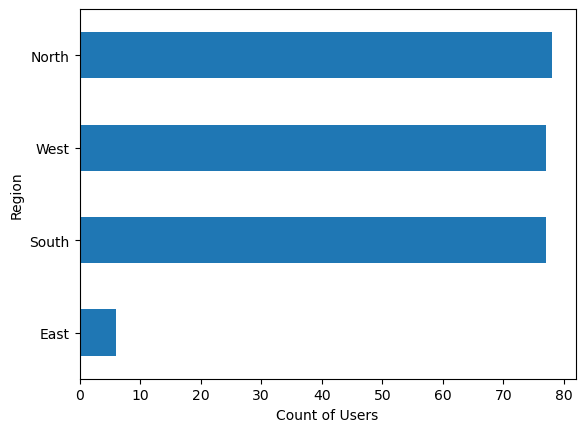

In [299]:
ax = df['Region'].value_counts().sort_values(ascending=True) \
    .plot(kind='barh')
ax.set_xlabel('Count of Users')
plt.show()


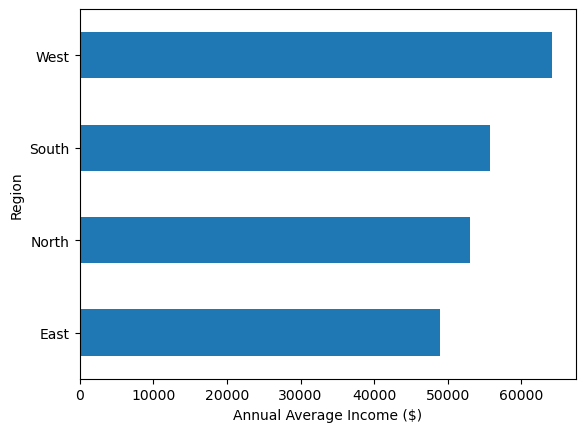

In [301]:
ax = df.groupby('Region')['Annual Income'].mean().sort_values(ascending = True)  \
    .plot(kind='barh')
ax.set_xlabel('Annual Average Income ($)')
plt.show()

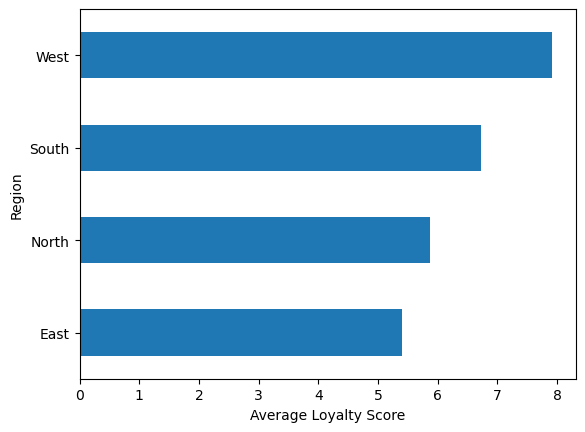

In [302]:
ax = df.groupby('Region')['Loyalty Score'].mean().sort_values(ascending = True) \
    .plot(kind = 'barh')
ax.set_xlabel('Average Loyalty Score')
plt.show()

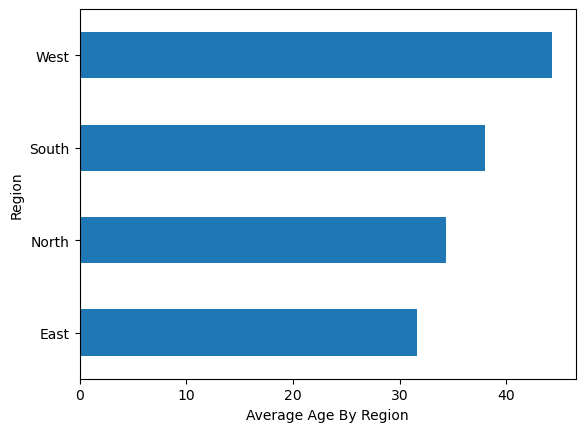

In [304]:
ax = df.groupby('Region')['Age'].mean().sort_values(ascending = True) \
    .plot(kind='barh')
ax.set_xlabel('Average Age By Region')
plt.show()

<Axes: xlabel='Annual Income', ylabel='Count'>

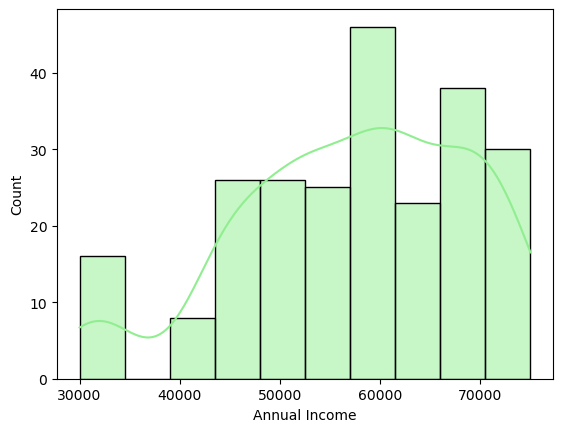

In [306]:
sns.histplot(df['Annual Income'], bins=10, kde=True, color='lightgreen')

<Axes: xlabel='Age', ylabel='Count'>

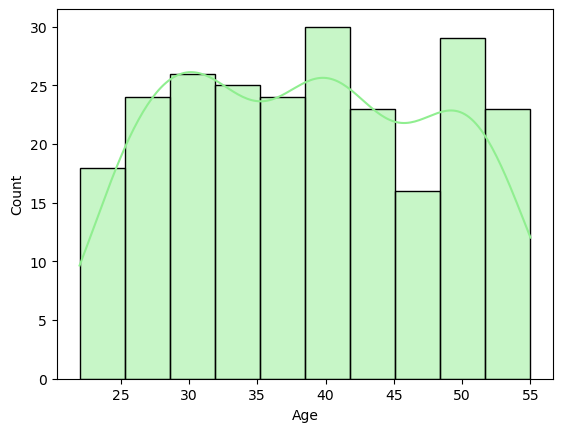

In [308]:
sns.histplot(df['Age'], bins=10, kde=True, color='lightgreen')

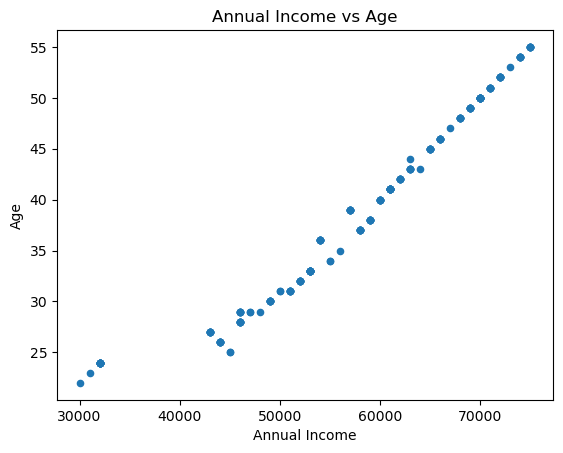

In [310]:
df.plot(kind='scatter',
       x='Annual Income',
       y='Age',
       title='Annual Income vs Age')
plt.show()

In [330]:
df[['Annual Income', 'Age']].corr()

,Annual Income,Age
Annual Income,1.000000,0.974833
Age,0.974833,1.000000


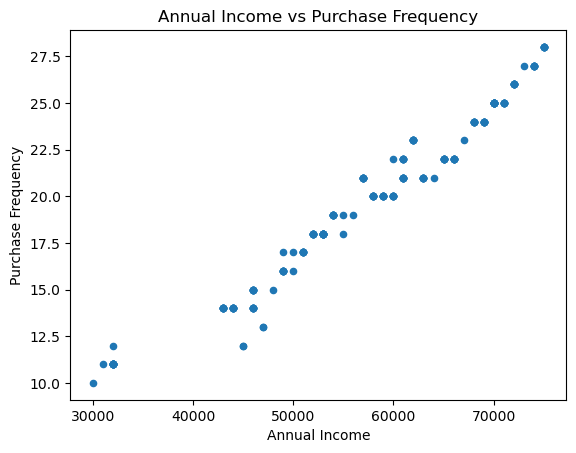

In [311]:
df.plot(kind = 'scatter', x = 'Annual Income', y = 'Purchase Frequency', title = 'Annual Income vs Purchase Frequency')
plt.show()

In [334]:
df[['Annual Income', 'Purchase Frequency']].corr()

,Annual Income,Purchase Frequency
Annual Income,1.00000,0.98292
Purchase Frequency,0.98292,1.00000


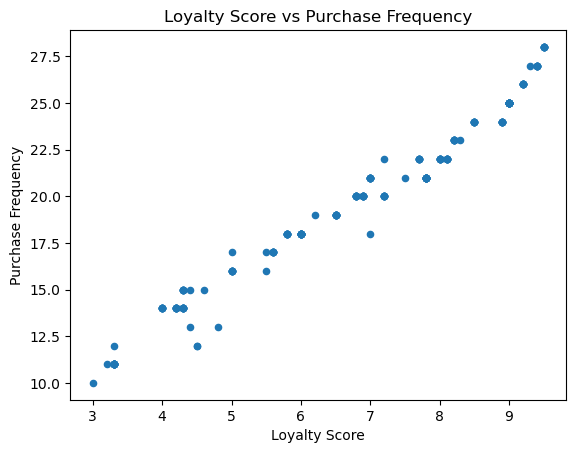

In [313]:
df.plot(kind = 'scatter', x = 'Loyalty Score', y = 'Purchase Frequency', title = 'Loyalty Score vs Purchase Frequency')
plt.show()

In [336]:
df[['Loyalty Score', 'Purchase Frequency']].corr()

,Loyalty Score,Purchase Frequency
Loyalty Score,1.00000,0.98699
Purchase Frequency,0.98699,1.00000


In [315]:
df.query('`Purchase Amount` > 200')

,User ID,Age,Annual Income,Purchase Amount,Loyalty Score,Region,Purchase Frequency
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
4,5,29,47000,220,4.8,North,13
5,6,41,61000,480,7.8,South,21
6,7,36,54000,400,6.5,West,19
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18


In [317]:
df.query('`Purchase Amount` > 200') \
    .groupby('Region')['Purchase Amount'] \
    .agg(['mean']) \
    .sort_values(by='mean', ascending=False)


,mean
Region,
West,519.200000
South,467.031250
North,363.289474
East,354.000000


In [318]:
df.query('`Age` > 30 and `Annual Income` > 70000')

,User ID,Age,Annual Income,Purchase Amount,Loyalty Score,Region,Purchase Frequency
20,21,52,72000,610,9.2,South,26
28,29,51,71000,600,9.0,West,25
34,35,55,75000,640,9.5,South,28
38,39,53,73000,620,9.3,West,27
44,45,52,72000,610,9.2,West,26
55,56,54,74000,630,9.4,South,27
59,60,55,75000,640,9.5,West,28
62,63,51,71000,600,9.0,West,25
74,75,52,72000,610,9.2,West,26
85,86,54,74000,630,9.4,South,27


In [323]:
df.dtypes

User ID                 int64
Age                     int64
Annual Income           int64
Purchase Amount         int64
Loyalty Score         float64
Region                 object
Purchase Frequency      int64
dtype: object

In [342]:
#Which region has the highest average purchase frequency?

df.groupby('Region')['Purchase Frequency']\
    .agg('mean')

Region
East     16.666667
North    17.653846
South    19.467532
West     22.545455
Name: Purchase Frequency, dtype: float64

In [356]:
#Is there a difference in average loyalty score across regions?

avg_loyalty_scores = df.groupby('Region')['Loyalty Score'].agg('mean')

if avg_loyalty_scores.nunique() > 1:
    print('Yes')
else:
    print('No')

Yes


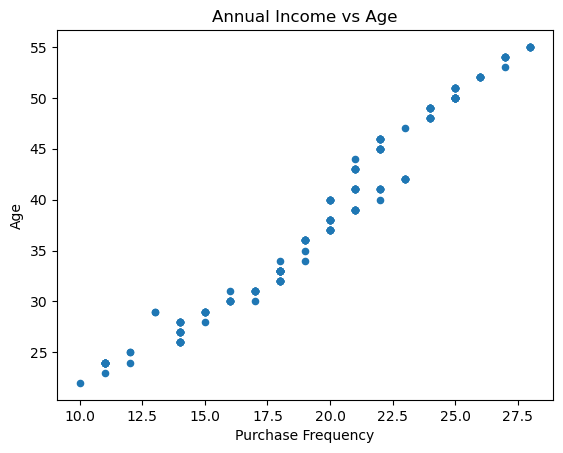

In [358]:
df.plot(kind='scatter',
       x='Purchase Frequency',
       y='Age',
       title='Annual Income vs Age')
plt.show()